### Ćwiczenie 5 - Ex. 5


1.  Wyświetlanie obrazu wczytanego z pliku o podanej nazwie
    <br>Display the image loaded from a file with the specified name

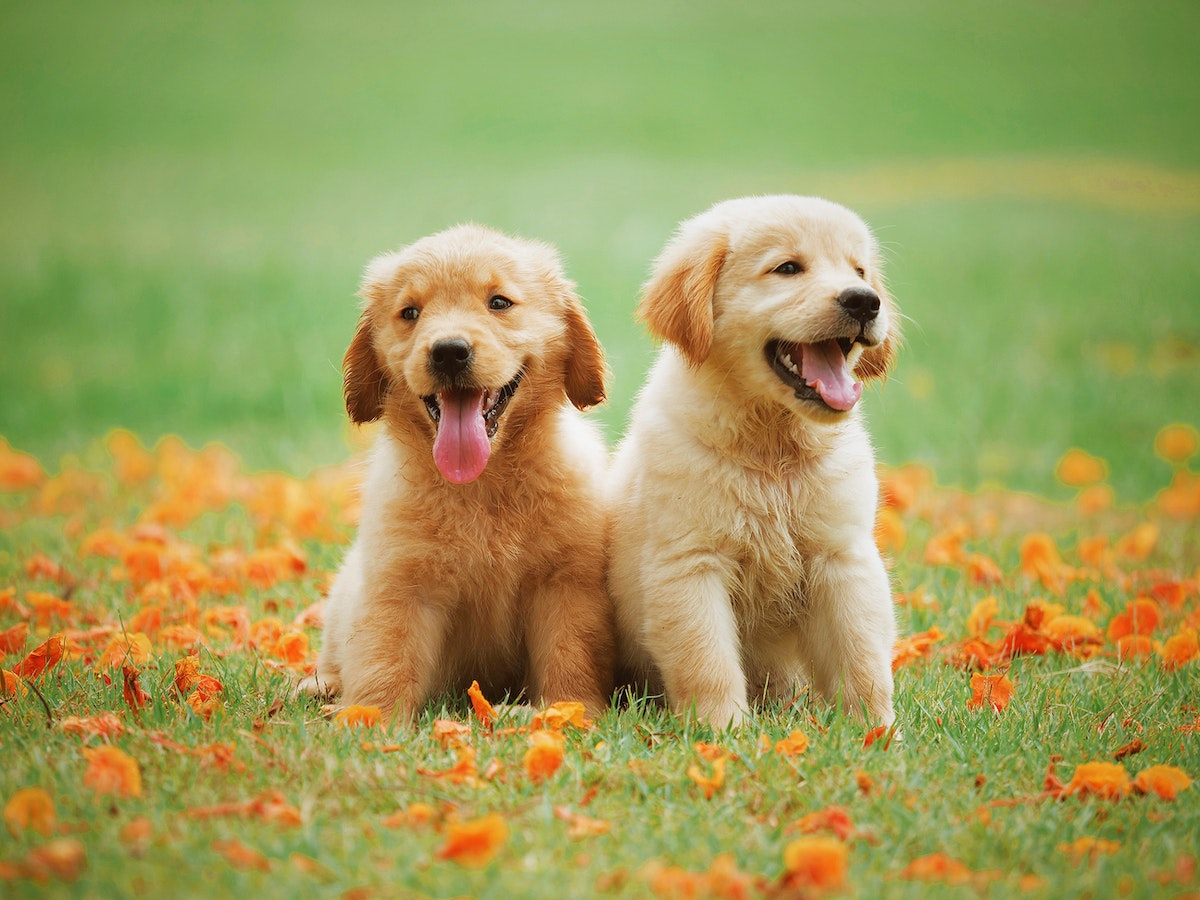

In [48]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

name = "dogs.jpg"
img = Image.open(name)

#plt.imshow(img)
img

2. Sporządzenie wykresów zmian poziomu szarości wzdłuż wybranej linii poziomej
lub pionowej o zadanej współrzędnej
<br>Plotting of grey level changes along a selected horizontal
or vertical line of a given coordinate

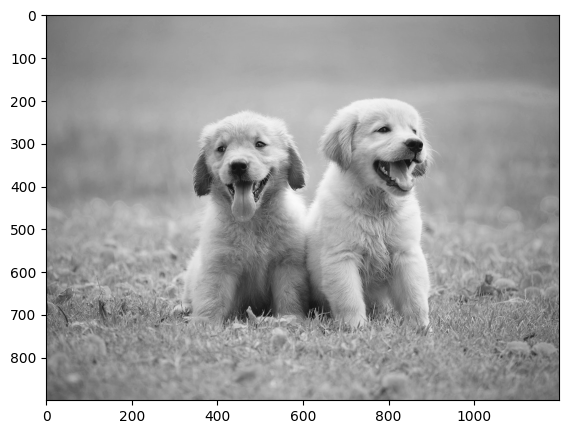

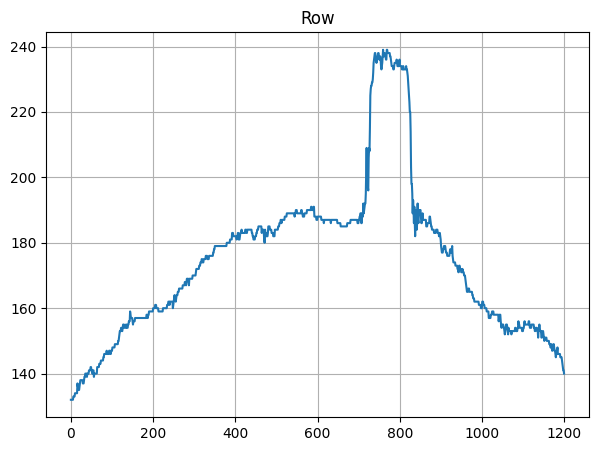

In [49]:
gray = Image.open(name).convert("L")
row = 200

plt.figure(figsize = [7, 5])
plt.imshow(gray, cmap='gray')

plt.figure(figsize = [7, 5])
gray_array = np.asarray(gray)
plt.title('Row')
plt.grid(axis="both")
plt.plot(np.arange(0, len(gray_array[row, :]), 1), gray_array[row, :])
plt.show()


3. Wybór podobrazu (prostokątnego obszaru) o podanych współrzędnych oraz jego
zapis do pliku o zadanej nazwie.
<br>Selection of a sub-image (rectangular area) with given coordinates and its
saving to a file with the given name.

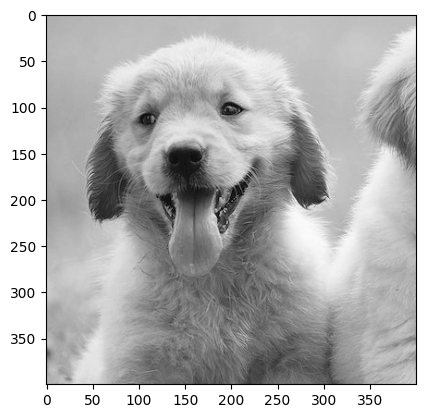

In [50]:
gray_cropped = gray_array[200:600, 300:700]
plt.imshow(gray_cropped, cmap='gray')
plt.savefig("cropped_dogs.jpg")

### Ćwiczenie 6 - Ex. 6


1. Mnożenie obrazu przez stałą c
<br>Multiplying the image by the constant c

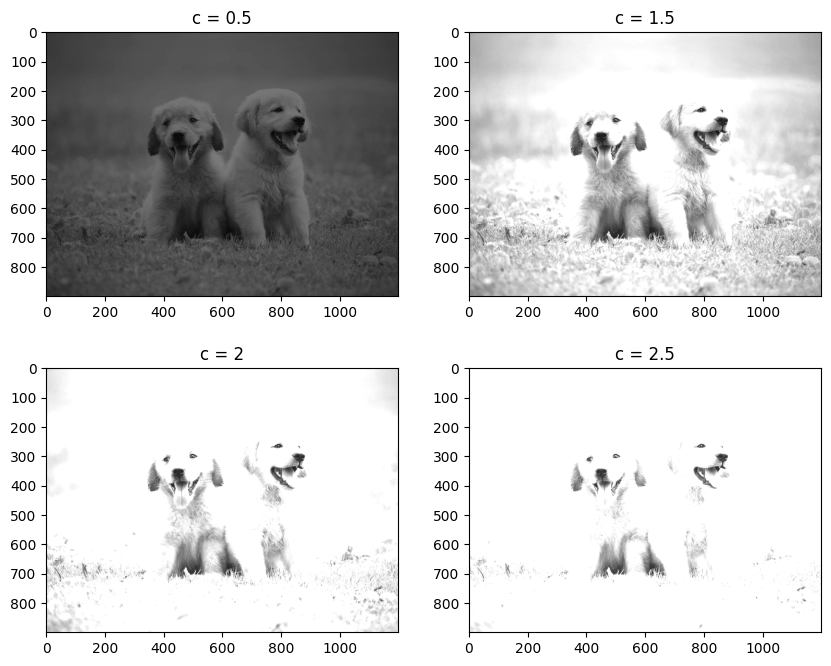

In [51]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title('c = 0.5')
plt.imshow(cv.multiply(gray_array,0.5), cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.title('c = 1.5')
plt.imshow(cv.multiply(gray_array,1.5), cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,3)
plt.title('c = 2')
plt.imshow(cv.multiply(gray_array,2), cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,4)
plt.title('c = 2.5')
plt.imshow(cv.multiply(gray_array,2.5), cmap='gray', vmin=0, vmax=255)

2. Zmiana dynamiki skali szarości (kontrastu)
<br>
Changing the grey scale dynamic range (contrast)

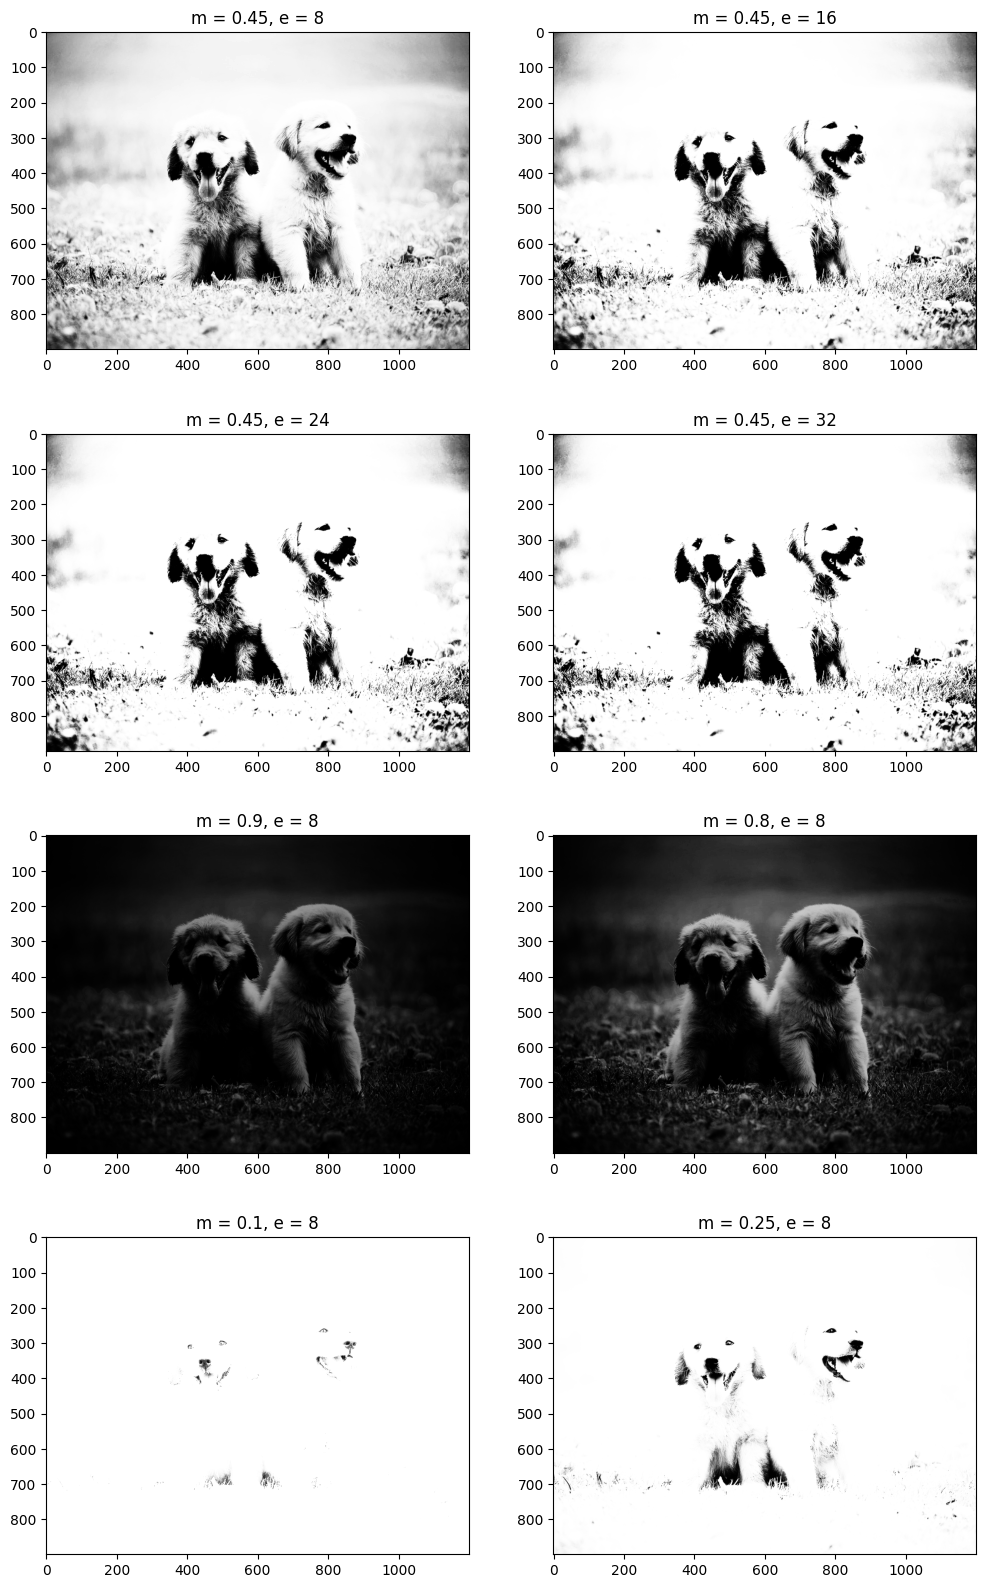

In [52]:
plt.figure(figsize=(12,20))
contrast_array = gray_array / 255

plt.subplot(4,2,1)
plt.title('m = 0.45, e = 8')
contrast = (255.0/(1+np.power((0.45/(contrast_array)),8)))
plt.imshow(contrast, cmap='gray', vmin=0, vmax=255)

plt.subplot(4,2,2)
plt.title('m = 0.45, e = 16')
contrast = (255.0/(1+np.power((0.45/(contrast_array)),16)))
plt.imshow(contrast, cmap='gray', vmin=0, vmax=255)

plt.subplot(4,2,3)
plt.title('m = 0.45, e = 24')
contrast = (255.0/(1+np.power((0.45/(contrast_array)),24)))
plt.imshow(contrast, cmap='gray', vmin=0, vmax=255)

plt.subplot(4,2,4)
plt.title('m = 0.45, e = 32')
contrast = (255.0/(1+np.power((0.45/(contrast_array)),32)))
plt.imshow(contrast, cmap='gray', vmin=0, vmax=255)

plt.subplot(4,2,5)
plt.title('m = 0.9, e = 8')
contrast = (255.0/(1+np.power((0.9/(contrast_array)),8)))
plt.imshow(contrast, cmap='gray', vmin=0, vmax=255)

plt.subplot(4,2,6)
plt.title('m = 0.8, e = 8')
contrast = (255.0/(1+np.power((0.8/(contrast_array)),8)))
plt.imshow(contrast, cmap='gray', vmin=0, vmax=255)

plt.subplot(4,2,7)
plt.title('m = 0.1, e = 8')
contrast = (255.0/(1+np.power((0.1/(contrast_array)),8)))
plt.imshow(contrast, cmap='gray', vmin=0, vmax=255)

plt.subplot(4,2,8)
plt.title('m = 0.25, e = 8')
contrast = (255.0/(1+np.power((0.25/(contrast_array)),8)))
plt.imshow(contrast, cmap='gray', vmin=0, vmax=255)

3. Korekcja gamma
<br> Gamma correction

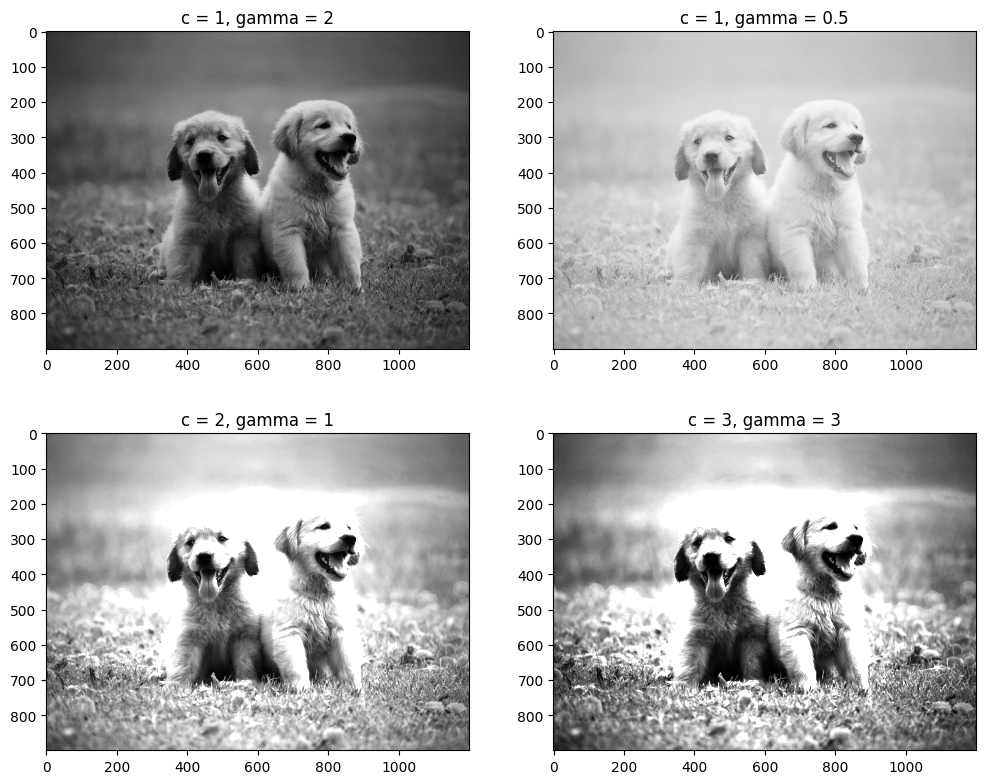

In [53]:
plt.figure(figsize=(12,20))
gamma_array = gray_array / 255

plt.subplot(4,2,1)
plt.title('c = 1, gamma = 2')
gamma = 255*1*np.power(gamma_array, 2)
plt.imshow(gamma, cmap='gray', vmin=0, vmax=255)

plt.subplot(4,2,2)
plt.title('c = 1, gamma = 0.5')
gamma = 255*1*np.power(gamma_array, 0.5)
plt.imshow(gamma, cmap='gray', vmin=0, vmax=255)

plt.subplot(4,2,3)
plt.title('c = 2, gamma = 1')
gamma = 255*2*np.power(gamma_array, 2)
plt.imshow(gamma, cmap='gray', vmin=0, vmax=255)

plt.subplot(4,2,4)
plt.title('c = 3, gamma = 3')
gamma = 255*3*np.power(gamma_array, 3)
plt.imshow(gamma, cmap='gray', vmin=0, vmax=255)

### Ćwiczenie 7 - Ex. 7


1. Wypróbowanie działania wyrównywania histogramu na przykładowych obrazach. By zaobserwować skuteczność procedury, poddaj wyrównywaniu obrazy zbyt ciemne i zbyt jasne. Narysować histogramy obrazów przed i po wyrównaniu.
<br> Trying out the operation of histogram equalisation on example images. To see the effectiveness of the procedure, equalize images that are too dark and too light. Draw the histograms of the images before and after equalisation.

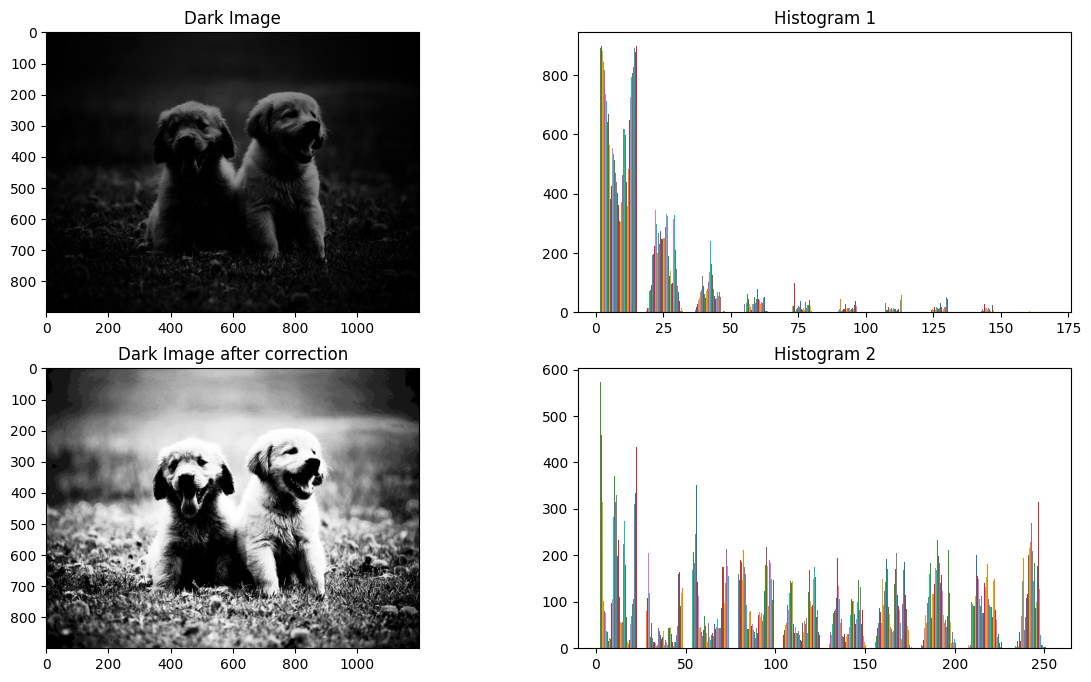

In [54]:
# create a dark image by increasing the contrast
dark_image = (255.0/(1+np.power((0.9/(gray_array / 255)),8)))

plt.figure(figsize=(14, 8))

plt.subplot(2,2,1)
plt.title('Dark Image')
plt.imshow(dark_image, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.title('Histogram 1')
plt.hist(dark_image)

correction = cv.equalizeHist(np.uint8(dark_image))
plt.subplot(2,2,3)
plt.title('Dark Image after correction')
plt.imshow(correction, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,4)
plt.title('Histogram 2')
plt.hist(correction)
plt.show()

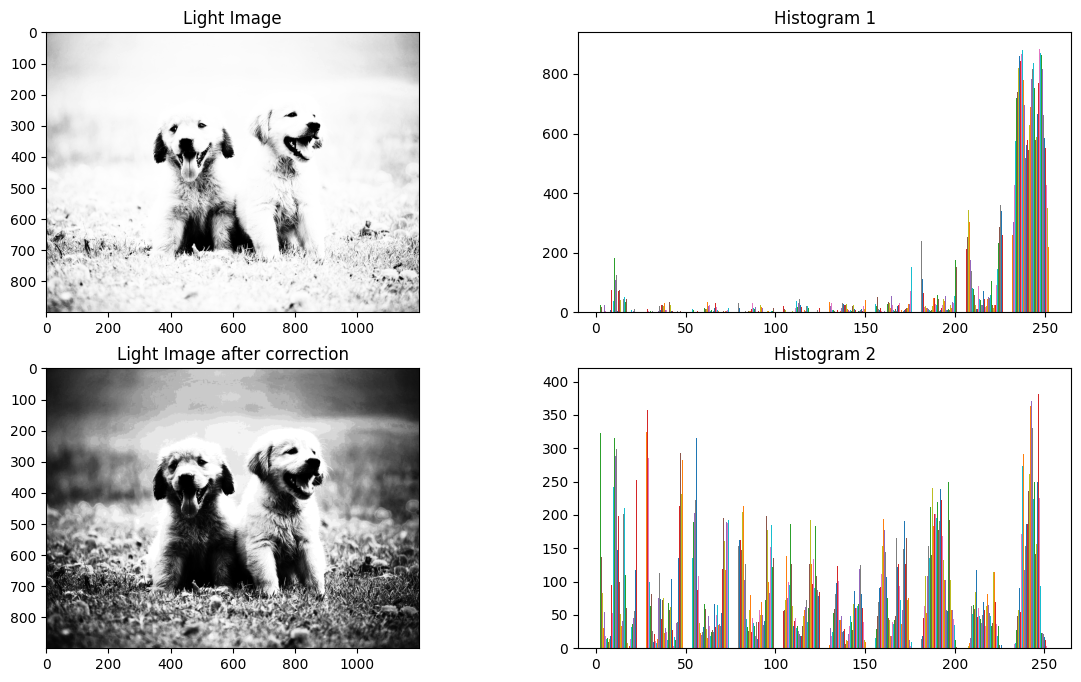

In [55]:
# create a light image by decreasing the contrast
light_image = (255.0/(1+np.power((0.4/(gray_array / 255)),8)))

plt.figure(figsize=(14, 8))

plt.subplot(2,2,1)
plt.title('Light Image')
plt.imshow(light_image, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.title('Histogram 1')
plt.hist(light_image)

correction = cv.equalizeHist(np.uint8(light_image))
plt.subplot(2,2,3)
plt.title('Light Image after correction')
plt.imshow(correction, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,4)
plt.title('Histogram 2')
plt.hist(correction)
plt.show()
